In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 특정 경고 필터링
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


1. 탐색 : 타이타닉 데이터 살펴보기

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


분석에 필요없어 보이는 컬럼 제거 "PassengerId", "Name"

In [4]:
df_train = df_train.drop(["PassengerId", "Name",'Ticket','Cabin'], axis = 1)
df_test = df_test.drop(["PassengerId", "Name",'Ticket','Cabin'], axis = 1)

In [5]:
y = df_train['Survived']

In [6]:
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

Text(0.5, 0, 'Survival Status')

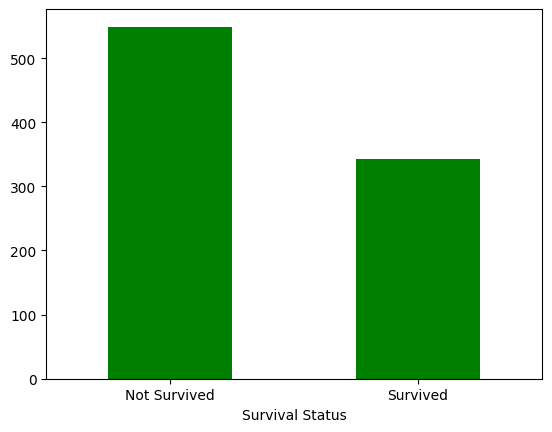

In [7]:
df_train['Survived'].value_counts().plot(kind='bar' ,color ='green')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation= 360)
plt.xlabel('Survival Status')

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

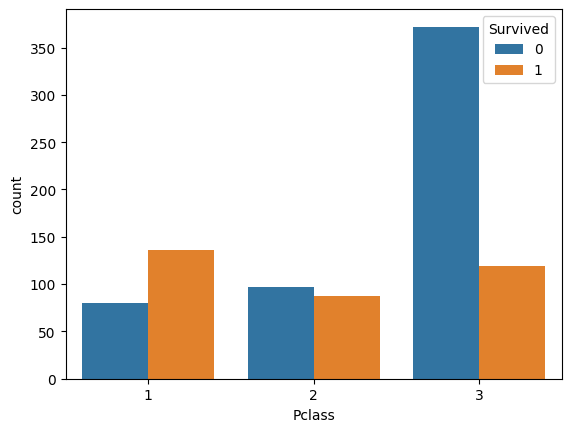

In [8]:
print(df_train['Age'].value_counts())
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train )

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

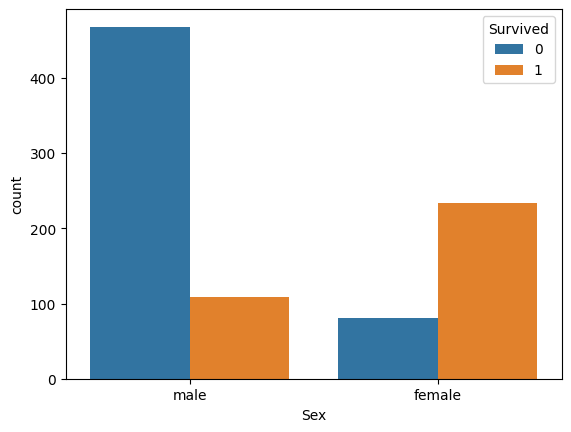

In [9]:
print(df_train['Sex'].value_counts())
sns.countplot(x = 'Sex', hue = 'Survived', data = df_train )

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

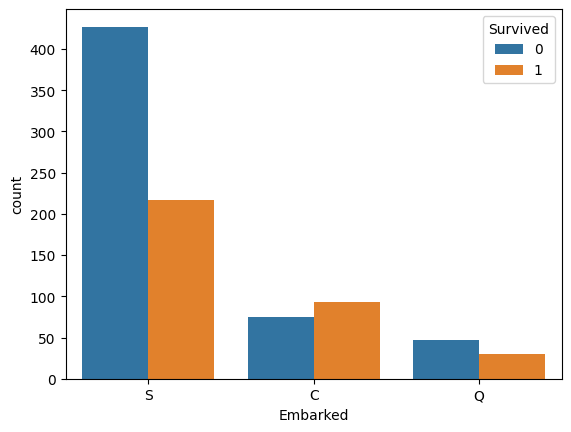

In [10]:
print(df_train['Embarked'].value_counts())
sns.countplot(x = 'Embarked', hue = 'Survived', data = df_train )

<Axes: >

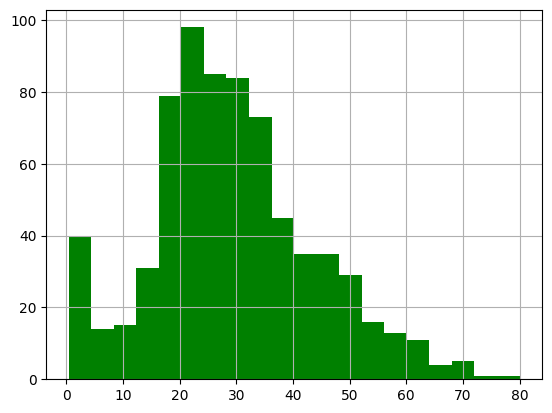

In [11]:
df_train['Age'].hist(bins= 'auto' ,color = 'green')

In [12]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: >

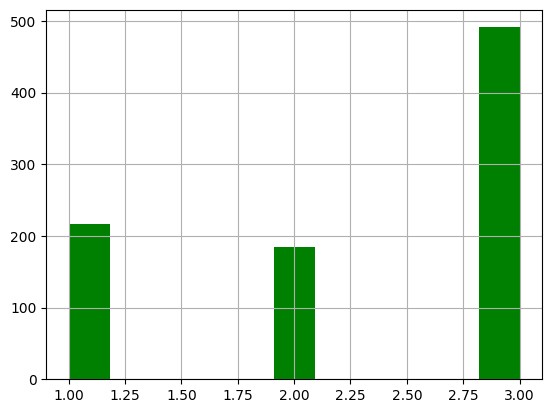

In [13]:
df_train['Pclass'].hist(bins= 'auto' ,color = 'green')

In [14]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: >

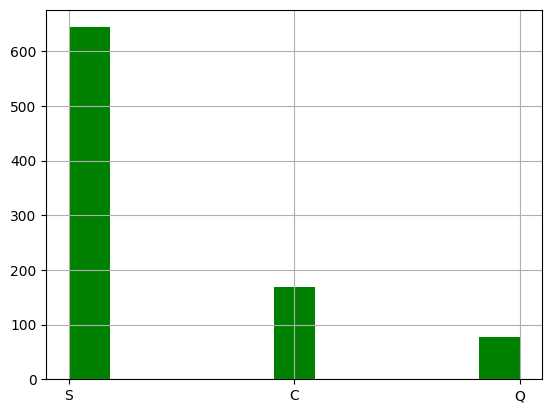

In [15]:
df_train['Embarked'].hist(bins= 'auto' ,color = 'green')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Survived1 data std is 14.93
Survived0 data std is 14.16
The w-statistic and p-value in Survived ShapiroResult(statistic=0.9827256798744202, pvalue=0.0014263729099184275)
The w-statistic and p-value in NoSurvived ShapiroResult(statistic=0.9689366221427917, pvalue=7.816021252438077e-08)


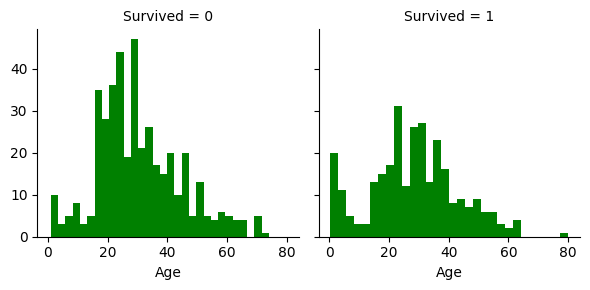

In [17]:
from scipy import stats

def valid_features(df , col_name , distribution_check = True):
    
    g = sns.FacetGrid(df, col= 'Survived')
    g.map(plt.hist, col_name, bins = 30 , color = 'g')
    
    titanic_survived = df[df['Survived'] == 1]
    titanic_survived_static = titanic_survived[col_name].values
    print("Survived1 data std is %.2f" % np.std(titanic_survived_static))
    titanic_no_survived = df[df['Survived'] == 0]
    titanic_no_survived_static = np.array(titanic_no_survived[col_name])
    print("Survived0 data std is %.2f" % np.std(titanic_no_survived_static))
    
    if(distribution_check):
        print(f'The w-statistic and p-value in Survived {stats.shapiro(titanic_survived[col_name])}')
        print(f'The w-statistic and p-value in NoSurvived {stats.shapiro(titanic_no_survived[col_name])}')
    
    
    
valid_features(df_train[df_train['Age'] > 0], col_name = 'Age')

In [18]:
df_train[df_train['Survived'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


In [19]:
df_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Survived1 data std is 0.77
Survived0 data std is 0.82
The w-statistic and p-value in Survived ShapiroResult(statistic=0.6388702392578125, pvalue=3.028426229935776e-26)
The w-statistic and p-value in NoSurvived ShapiroResult(statistic=0.4588158130645752, pvalue=1.2654528917652235e-37)


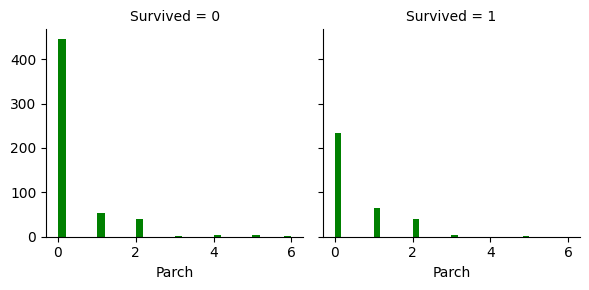

In [20]:
valid_features(df_train, col_name = 'Parch')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Survived1 data std is 0.71
Survived0 data std is 1.29
The w-statistic and p-value in Survived ShapiroResult(statistic=0.654767632484436, pvalue=9.322872809252207e-26)
The w-statistic and p-value in NoSurvived ShapiroResult(statistic=0.4841800332069397, pvalue=5.567619776588494e-37)


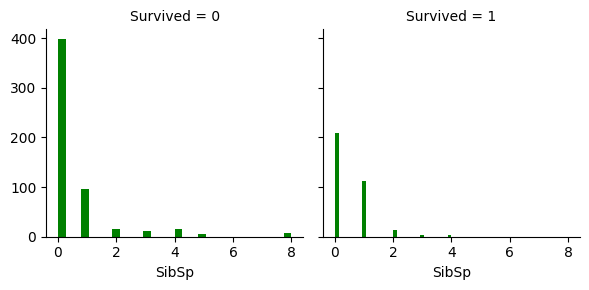

In [21]:
valid_features(df_train, col_name = 'SibSp')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Survived1 data std is 66.50
Survived0 data std is 31.36
The w-statistic and p-value in Survived ShapiroResult(statistic=0.5967273712158203, pvalue=1.8337799743381398e-27)
The w-statistic and p-value in NoSurvived ShapiroResult(statistic=0.513036847114563, pvalue=3.233740189307736e-36)


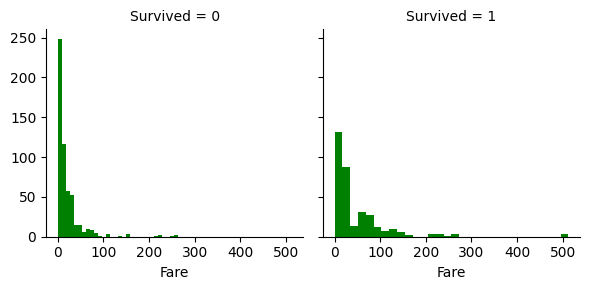

In [22]:
valid_features(df_train, col_name = 'Fare')

표준편차를 보고 미루어 
Pclass , Embarked , SibSp , Fare , Sex 열은 
survived 그룹 별로 유의미한 차이를 보이는것 같음

분류 : 생존자 분류 모델 만들기
분류 모델을 위해 먼저 전처리 하기

2-1 결측치 제거하기

In [23]:
reaplce_mean = df_train["Age"].mean().round()
df_train["Age"] = df_train["Age"].fillna(reaplce_mean).astype(int)
df_test["Age"] = df_test["Age"].fillna(reaplce_mean).astype(int)
df_train['Age'].isnull().sum()

0

In [24]:
embarked_mode = df_train['Embarked'].value_counts().index[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)
df_test['Embarked'] = df_test['Embarked'].fillna(embarked_mode)
df_train['Embarked'].isnull().sum()

0

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [26]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


2-2 범주형 변수 원 핫 인코딩 수행하여 연산가능한 형태로 변환하기

In [27]:
total_df = pd.concat([df_train.drop('Survived', axis = 1),df_test],ignore_index = True)
total_df2 = total_df.drop(['Sex','Embarked'], axis = 1)
total_df2

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7.2500
1,1,38,1,0,71.2833
2,3,26,0,0,7.9250
3,1,35,1,0,53.1000
4,3,35,0,0,8.0500
...,...,...,...,...,...
1304,3,30,0,0,8.0500
1305,1,39,0,0,108.9000
1306,3,38,0,0,7.2500
1307,3,30,0,0,8.0500


In [28]:
no_columns = ['Pclass','Age','Sibsp','SibSp','Parch','Fare']
selected_columns = total_df.columns.difference(no_columns)
dummies_df = pd.get_dummies(total_df[selected_columns])
dummies_df = dummies_df.astype(int)
dummies_df

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
...,...,...,...,...,...
1304,0,0,1,0,1
1305,1,0,0,1,0
1306,0,0,1,0,1
1307,0,0,1,0,1


In [29]:
total_df2

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7.2500
1,1,38,1,0,71.2833
2,3,26,0,0,7.9250
3,1,35,1,0,53.1000
4,3,35,0,0,8.0500
...,...,...,...,...,...
1304,3,30,0,0,8.0500
1305,1,39,0,0,108.9000
1306,3,38,0,0,7.2500
1307,3,30,0,0,8.0500


In [30]:
total_df3 = pd.concat([total_df2,dummies_df], axis = 1)
total_df3

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22,1,0,7.2500,0,0,1,0,1
1,1,38,1,0,71.2833,1,0,0,1,0
2,3,26,0,0,7.9250,0,0,1,1,0
3,1,35,1,0,53.1000,0,0,1,1,0
4,3,35,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,30,0,0,8.0500,0,0,1,0,1
1305,1,39,0,0,108.9000,1,0,0,1,0
1306,3,38,0,0,7.2500,0,0,1,0,1
1307,3,30,0,0,8.0500,0,0,1,0,1


In [31]:
idx_train = len(df_train)
df_train2 = total_df3[:idx_train]
df_test2 = total_df3[idx_train:]
print(f'train : {len(df_train2)} , test : {len(df_test2)}')
df_train2

train : 891 , test : 418


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22,1,0,7.2500,0,0,1,0,1
1,1,38,1,0,71.2833,1,0,0,1,0
2,3,26,0,0,7.9250,0,0,1,1,0
3,1,35,1,0,53.1000,0,0,1,1,0
4,3,35,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,0,1,0,1
887,1,19,0,0,30.0000,0,0,1,1,0
888,3,30,1,2,23.4500,0,0,1,1,0
889,1,26,0,0,30.0000,1,0,0,0,1


분류 모델링 : 로지스틱 회귀 모델

In [32]:
x = df_train2.values
y = y.values
print(x[:3])
print(y[:3])

[[ 3.     22.      1.      0.      7.25    0.      0.      1.      0.
   1.    ]
 [ 1.     38.      1.      0.     71.2833  1.      0.      0.      1.
   0.    ]
 [ 3.     26.      0.      0.      7.925   0.      0.      1.      1.
   0.    ]]
[0 1 1]


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score, precision_score , recall_score

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 10)

lr = LogisticRegression(random_state = 10)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]
y_pred_probability[:3]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.09571909, 0.14442558, 0.12305643])

분류 모델의 평가 기준 Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test , y_pred)
matrix

array([[102,  15],
       [ 17,  45]])

In [35]:
print(f'accuracy score : {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision score : {precision_score(y_test, y_pred):.3f}')
print(f'recall score : {recall_score(y_test, y_pred):.3f}')
print(f'f1 score : {f1_score(y_test, y_pred):.3f}')

accuracy score : 0.821
Precision score : 0.750
recall score : 0.726
f1 score : 0.738


AUC : 0.859


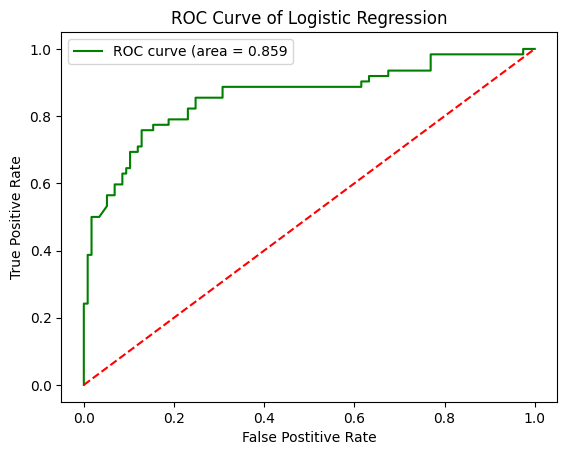

In [36]:
from sklearn.metrics import roc_curve , roc_auc_score

# AUC(Area Under the Curve)를 계산하여 출력합니다.
a , b , c = roc_curve(y_test,y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print(f'AUC : {roc_auc:.3f}')

# ROC curve 그래프를 출력합니다
plt.figsize = [5,4]
plt.plot(a,b , label = f'ROC curve (area = {roc_auc:.3f}' , color = 'green')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Postitive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve of Logistic Regression")
plt.legend(loc = 'best')

3 모델 개선 : Feature Enginering 첫걸음

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [38]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train = df_train.drop(["PassengerId",'Ticket'], axis = 1)
df_test = df_test.drop(["PassengerId",'Ticket'], axis = 1)

y = df_train["Survived"]

# Age 열 평균값으로 대체
reaplce_mean = df_train["Age"].mean().round()
df_train["Age"] = df_train["Age"].fillna(reaplce_mean).astype(int)
df_test["Age"] = df_test["Age"].fillna(reaplce_mean).astype(int)
df_train['Age'].isnull().sum()

# Age 열 최빈값으로 대체
embarked_mode = df_train['Embarked'].value_counts().index[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)
df_test['Embarked'] = df_test['Embarked'].fillna(embarked_mode)
df_train['Embarked'].isnull().sum()

total_df = pd.concat([df_train.drop('Survived', axis = 1),df_test],ignore_index = True)

total_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S


Cabin Feature 활용하기

In [39]:
total_df['Cabin'].value_counts()[:10]

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
Name: count, dtype: int64

In [40]:
#관측지가 적은 G 와 T 결측값을 X로 대체 합니다
from collections import Counter

cabin_length = total_df['Cabin'].value_counts().index.tolist()
cabin_kind = []
for i in range(len(cabin_length)):
    cabin_kind.append(cabin_length[i][0])
cabin_kind = Counter(cabin_kind).most_common()
cabin_kind 

[('C', 56),
 ('B', 41),
 ('D', 30),
 ('E', 27),
 ('A', 20),
 ('F', 10),
 ('G', 1),
 ('T', 1)]

In [41]:
total_df['Cabin'].fillna('X').apply(lambda x : x[0]).replace({'G' : 'X' , "T" : 'X'})

0       X
1       C
2       X
3       C
4       X
       ..
1304    X
1305    C
1306    X
1307    X
1308    X
Name: Cabin, Length: 1309, dtype: object

In [42]:
total_df['Cabin'] = total_df['Cabin'].fillna('X').apply(lambda x : x[0]).replace({'G' : 'X' , "T" : 'X'})
total_df['Cabin'].value_counts()

Cabin
X    1020
C      94
B      65
D      46
E      41
A      22
F      21
Name: count, dtype: int64

<Axes: xlabel='Cabin', ylabel='count'>

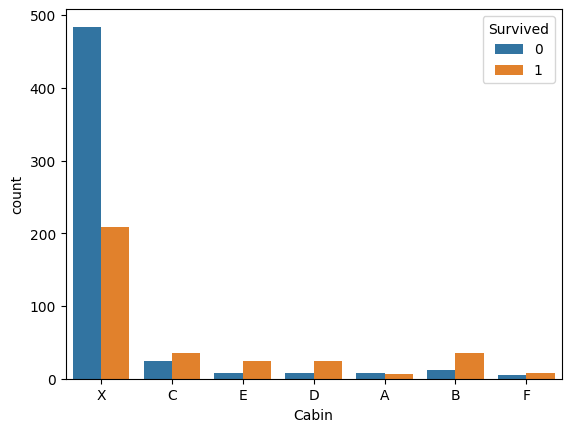

In [43]:
train_length = len(df_train)
df_train_test = total_df[:train_length]
df_train_test = pd.concat([df_train_test,y] , axis = 1)
sns.countplot(x='Cabin', hue ='Survived', data = df_train_test)

name Feature 활용하기 중간에 호칭이 들어가있음

In [44]:
total_df.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [45]:
name_grade = total_df["Name"].apply(lambda x : x.split(', ', 1)[1].split('.')[0])
print(name_grade.unique())
name_grade = name_grade.unique().tolist()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [46]:
grade_dict = {'A' :  ['Rev','Col','Major','Dr','Capt','Sir'],  # 명예직
             'B' : ['Ms','Mme','Mrs','Dona'],    # 여성
             'C' : ['Jonkheer', 'the Countess'],    # 귀족이나 작위
             'D' : ['Mr,','Don'],      # 남성
             'E': ['Master'],      # 젊은 남성
             'F' : ['Miss','Mile','Lday']}   # 젊은 여성

In [47]:
def give_grade(x):
    grade = x.split(', ', 1)[1].split('.')[0]
    for k , v in grade_dict.items():
        for title in v:
            if(grade == title):
                return k
    return 'G'

In [48]:
total_df['Name'] = total_df['Name'].apply(lambda x : give_grade(x))
total_df['Name']

0       G
1       B
2       F
3       B
4       G
       ..
1304    G
1305    B
1306    G
1307    G
1308    E
Name: Name, Length: 1309, dtype: object

In [49]:
total_df['Name'].value_counts()

Name
G    760
F    260
B    201
E     61
A     24
C      2
D      1
Name: count, dtype: int64

In [50]:
# 범주형 변수 원 핫 인코딩
total_df2 = total_df.drop(['Sex','Embarked','Cabin','Name'], axis = 1)

no_columns = ['Pclass','Age','Sibsp','SibSp','Parch','Fare']
selected_columns = total_df.columns.difference(no_columns)
dummies_df = pd.get_dummies(total_df[selected_columns])
dummies_df = dummies_df.astype(int)

total_df = pd.concat([total_df2,dummies_df], axis = 1)
total_df

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_S,Name_A,Name_B,Name_C,Name_D,Name_E,Name_F,Name_G,Sex_female,Sex_male
0,3,22,1,0,7.2500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1,38,1,0,71.2833,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.9250,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,1,35,1,0,53.1000,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,3,35,0,0,8.0500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30,0,0,8.0500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1305,1,39,0,0,108.9000,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1306,3,38,0,0,7.2500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1307,3,30,0,0,8.0500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score, precision_score , recall_score

x = total_df[:train_length]
df_test = total_df[train_length:]

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 10)

lr = LogisticRegression(random_state = 10)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]
y_pred_probability[:3]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.08004594, 0.11382966, 0.09929154])

In [52]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test , y_pred)
matrix

array([[100,  17],
       [ 12,  50]])

In [53]:
print(f'accuracy score : {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision score : {precision_score(y_test, y_pred):.3f}')
print(f'recall score : {recall_score(y_test, y_pred):.3f}')
print(f'f1 score : {f1_score(y_test, y_pred):.3f}')

accuracy score : 0.838
Precision score : 0.746
recall score : 0.806
f1 score : 0.775


AUC : 0.896


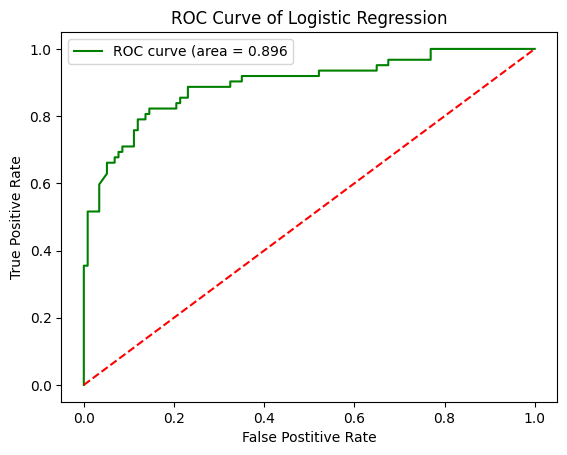

In [54]:
from sklearn.metrics import roc_curve , roc_auc_score

# AUC(Area Under the Curve)를 계산하여 출력합니다.
a , b , c = roc_curve(y_test,y_pred_probability)
roc_auc = roc_auc_score(y_test,y_pred_probability)
print(f'AUC : {roc_auc:.3f}')

# ROC curve 그래프를 출력합니다
plt.figsize = [5,4]
plt.plot(a,b , label = f'ROC curve (area = {roc_auc:.3f}' , color = 'green')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Postitive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve of Logistic Regression")
plt.legend(loc = 'best')

피쳐 영향력 살펴보기

In [55]:
lr.coef_[0]

array([-0.65567014, -0.02598552, -0.57257616, -0.30727644,  0.00354449,
        0.13714306,  0.16114052, -0.32387816,  0.81153468,  1.06010909,
        0.27630831, -0.56186883,  0.79709699,  0.57303915,  0.19035252,
       -0.28240454,  0.93079734, -0.06120475, -0.1379386 ,  1.81884841,
        0.3303745 , -1.03798369,  1.53405132,  0.02643734])

Text(0.5, 1.0, "Each Feature's Coef")

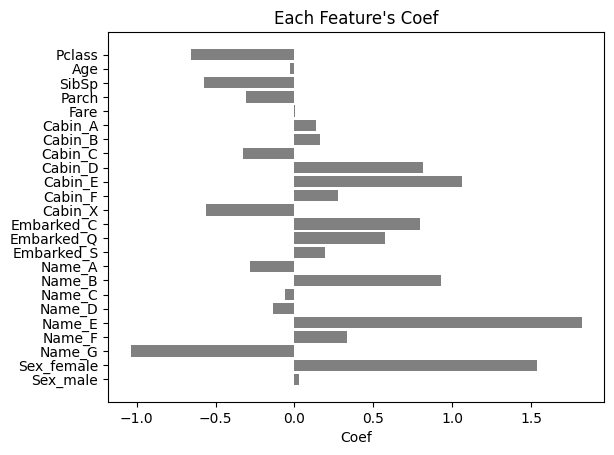

In [56]:
cols = x_train.columns.tolist()
y_pos = np.arange(len(cols))

plt.figsize = [5,4]
fig , ax = plt.subplots()
ax.barh(y_pos , lr.coef_[0] , color = 'gray')
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")

4 평가 : 모델 검증하기
    - 모델의 과적합 여부 
    - K-fodl 교차 검증

In [57]:
total_df_train = total_df[:len(df_train)]
total_df_train

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_S,Name_A,Name_B,Name_C,Name_D,Name_E,Name_F,Name_G,Sex_female,Sex_male
0,3,22,1,0,7.2500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1,38,1,0,71.2833,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7.9250,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,1,35,1,0,53.1000,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,3,35,0,0,8.0500,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
887,1,19,0,0,30.0000,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
888,3,30,1,2,23.4500,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
889,1,26,0,0,30.0000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [58]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

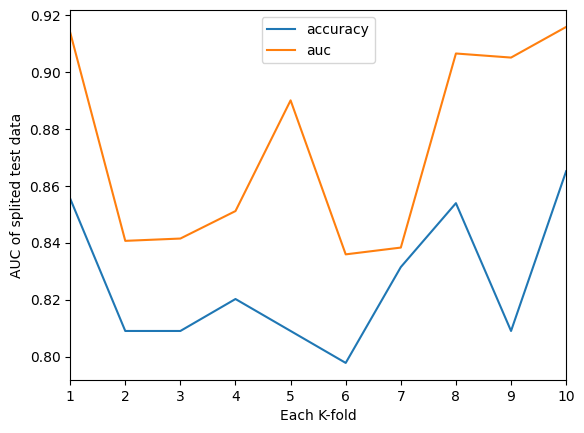

In [59]:
from sklearn.model_selection import KFold

k = 10
cv = KFold(k, shuffle = True , random_state = 0)
auc_history = []
accuracy_history = []

for i , (train_data, test_data) in enumerate(cv.split(total_df_train)):
    df_train = total_df.iloc[train_data]
    df_test =total_df.iloc[test_data]
    
    
    splited_x_train = df_train.values
    splited_x_test = df_test.values
    splited_y_train = y[train_data].values 
    splited_y_test = y[test_data].values
    
    lr = LogisticRegression(random_state = 10)
    lr.fit(splited_x_train,splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:,1]
    
    accuracy = accuracy_score(splited_y_test, y_pred)
    accuracy_history.append(accuracy)
    
    a, b , c = roc_curve(splited_y_test, y_pred_probability)
    roc_auc = roc_auc_score(splited_y_test, y_pred_probability)
    auc_history.append(roc_auc)
    
plt.plot(range(1,k+1) , accuracy_history, label = 'accuracy')
plt.xlabel("Each K-fold")
plt.xlim([1,10])
plt.ylabel('accuracy_score of splited test data')
plt.legend(loc = 'best')

plt.plot(range(1,k+1) , auc_history , label = 'auc')
plt.xlabel("Each K-fold")
plt.xlim([1,10])
plt.ylabel('AUC of splited test data')
plt.legend(loc = 'best')

학습 곡선

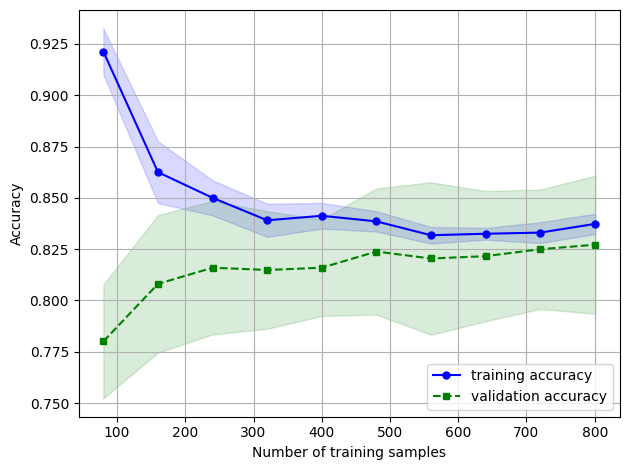

In [60]:
from sklearn.model_selection import learning_curve

lr = LogisticRegression(solver='liblinear', multi_class='auto',C=100.0, random_state=78)

train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=total_df_train, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=10) 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show() 